In [1]:
%load_ext autoreload
%autoreload 2 


import numpy as np
%matplotlib inline


In [2]:
# from re1_utils.camera import get_rs_extrinsic_mat
# extrinsic_mat = get_rs_extrinsic_mat(type = 'cam2base')
# from re1_utils.camera import get_rs_intrinsic_mat
# intrinsic_mat = get_rs_intrinsic_mat()
# print(intrinsic_mat)
# inv_intrinsic_mat = np.linalg.inv(intrinsic_mat)
# print(inv_intrinsic_mat)
# from re1_utils.camera import get_rs_extrinsic_mat
# inv_extrinsic_mat = get_rs_extrinsic_mat(type = 'cam2base')
# print(inv_extrinsic_mat)


In [3]:
from re1_utils.math_utils import get_rotation_mat
inv_intrinsic_mat = np.array(
[[ 0.00164891,  0.,         -0.53420447,],
 [ 0.        ,  0.00164907, -0.38722027,],
 [ 0.        ,  0.,          1.,        ]]
)
height = 1.28575359
head_pan = 0.10891263593988053
head_tilt = 0.027611654181941538
inv_extrinsic_mat = get_rotation_mat(x_angle=0, y_angle=-head_tilt, z_angle=-head_pan)
inv_extrinsic_mat = np.concatenate((inv_extrinsic_mat, np.array([0,0,height]).reshape(3,1)), axis=1)
inv_extrinsic_mat = np.concatenate((inv_extrinsic_mat, np.array([0,0,0,1]).reshape(1,4)), axis=0)
print(inv_extrinsic_mat)


[[ 0.99369596  0.10869744 -0.02744456  0.        ]
 [-0.10865601  0.99407488  0.00300093  0.        ]
 [ 0.02760815  0.          0.99961882  1.28575359]
 [ 0.          0.          0.          1.        ]]


In [6]:
import sys
sys.path.append('./yolov7/')

from POI.object_of_interest import OOI
pred =np.array(
[[         70,         479,         116,         628,     0.89845,          39],
 [        199,         492,         249,         633,     0.87461,          39],
 [        218,         256,         258,         367,     0.34034,          39]]
)
depths = [1.2018723487854004, 1.1422603130340576, 1.3461313247680664]
all_objects = []
for i in range(pred.shape[0]):
    coord = pred[i, :]
    obj = OOI(
        img_coord = np.array([(coord[2]+coord[0])/2,(coord[3]+coord[1])/2]), 
        depth = depths[i],
        obj_class = int(coord[-1]),
        obj_atributes = 'None', 
        bbox = ((coord[0],coord[1]),(coord[2],coord[3])),
        conf_score = coord[4],
        eid = i
    )
    all_objects.append(obj)

In [7]:
landmarks = {'locations': {}, 'objects': {}}
for i, object in enumerate(all_objects):
    landmarks['objects'][i] = object
    landmarks['objects'][i].set_cam_coord(inv_intrinsic_mat)
    landmarks['objects'][i].set_world_coord(inv_extrinsic_mat)

In [8]:
for i, object in enumerate(all_objects):
    print(landmarks['objects'][i].obj_name, landmarks['objects'][i].img_coord[:-1])
    print(landmarks['objects'][i].temp_cam_coord)
    print(landmarks['objects'][i].cam_coord,landmarks['objects'][i].base_coord)
    

bottle [         93       553.5]
[   -0.47062    -0.28107      1.2019]
[     1.2019     0.28107    -0.47062] [     1.2378      0.1474     0.84849]
bottle [        224       562.5]
[   -0.46423   -0.020365      1.1423]
[     1.1423    0.020365    -0.46423] [       1.15    -0.10526     0.85324]
bottle [        238       311.5]
[   0.010045   0.0070785      1.3461]
[     1.3461  -0.0070785    0.010045] [     1.3366    -0.15327       1.333]


In [11]:
from POI.viz_coord import Visualizer
viz = Visualizer(landmark_dict=landmarks)

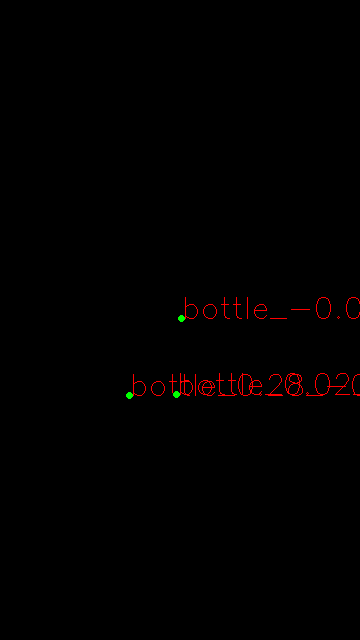

In [13]:
viz.viz_cam()


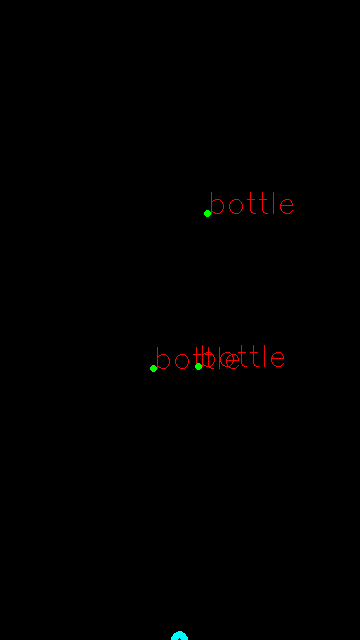

In [14]:
viz.viz_base(coord_type='yz')

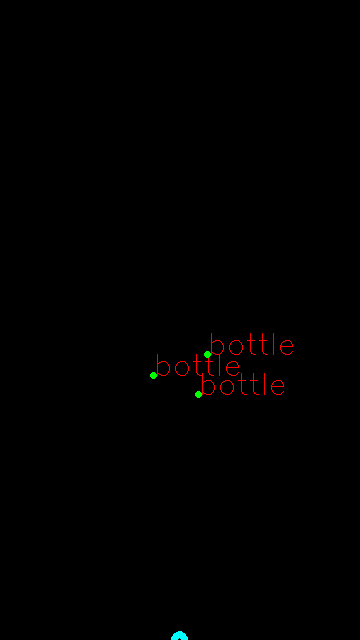

In [15]:
viz.viz_base(coord_type='xy')